In [250]:
import pandas as pd
# reading in the csv
global_temperature_statistics = pd.read_csv("datasets/Global/GlobalLandTemperaturesByCountry.csv").copy()
global_economy_statistics = pd.read_csv("datasets/Global/Global Economy Indicators.csv").copy()

In [251]:
global_temperature_statistics['AverageTemperature'] = global_temperature_statistics["AverageTemperature"].fillna(0)
global_economy_statistics = global_economy_statistics[global_economy_statistics["Year"].astype(float) < 2013]
global_economy_statistics['Country'] = global_economy_statistics['Country'].apply(lambda x: x.strip())

In [252]:
# was trying to figure out for a while why 2013 wasn't included in the refined dataset and its because the dataset hadn't recorded 12 months of 2013 (dataset ends at September 2013) so I'm going to do up to the end of 2012
average_year_temperature = 0
year_column = []
temperature_column = []
country_column = []
for index, row in global_temperature_statistics.iterrows():
    date = row['dt']
    month = int(date[5:7])
    year = int(date[:4])
    country = row["Country"]
    average_monthly_temperature = float(row['AverageTemperature'])
    if year < 1970 or year > 2012:
        continue
    average_year_temperature += average_monthly_temperature
    if month == 12:
        year_column.append(year)
        temperature_column.append(average_year_temperature / 12)
        country_column.append(row["Country"])
        average_year_temperature = 0

In [253]:
refined_global_temperature_data = {"Year" : year_column, "Yearly Average Temperature" : temperature_column, "Country" : country_column}
refined_global_temperature_statistics = pd.DataFrame(refined_global_temperature_data)
refined_global_temperature_statistics

,Year,Yearly Average Temperature,Country
0,1970,4.442833,Åland
1,1971,5.623750,Åland
2,1972,6.358333,Åland
3,1973,6.198083,Åland
4,1974,6.766917,Åland
...,...,...,...
10444,2008,21.545583,Zimbabwe
10445,2009,21.377250,Zimbabwe
10446,2010,21.986250,Zimbabwe
10447,2011,21.602417,Zimbabwe


In [254]:
countries_we_need = set(global_economy_statistics["Country"].tolist())
refined_global_temperature_statistics = refined_global_temperature_statistics[refined_global_temperature_statistics['Country'].isin(countries_we_need)]
refined_global_temperature_statistics.reset_index()

,index,Year,Yearly Average Temperature,Country
0,43,1970,14.783083,Afghanistan
1,44,1971,14.823500,Afghanistan
2,45,1972,12.547167,Afghanistan
3,46,1973,14.235500,Afghanistan
4,47,1974,13.316750,Afghanistan
...,...,...,...,...
7219,10444,2008,21.545583,Zimbabwe
7220,10445,2009,21.377250,Zimbabwe
7221,10446,2010,21.986250,Zimbabwe
7222,10447,2011,21.602417,Zimbabwe


In [255]:
global_economy_statistics = global_economy_statistics[global_economy_statistics['Country'].isin(countries_we_need)]
global_economy_statistics.reset_index()

,index,CountryID,Country,Year,Gross Domestic Product (GDP)
0,0,4,Afghanistan,1970,1.731436e+09
1,1,4,Afghanistan,1971,1.812838e+09
2,2,4,Afghanistan,1972,1.647900e+09
3,3,4,Afghanistan,1973,1.702716e+09
4,4,4,Afghanistan,1974,2.061729e+09
...,...,...,...,...,...
8600,10499,894,Zambia,2009,1.532830e+10
8601,10500,894,Zambia,2010,2.026540e+10
8602,10501,894,Zambia,2011,2.448759e+10
8603,10502,894,Zambia,2012,2.484821e+10


In [256]:
economy_and_temperature_statistics = pd.merge(global_economy_statistics, refined_global_temperature_statistics, on=['Year', 'Country'])
economy_and_temperature_statistics

,CountryID,Country,Year,Gross Domestic Product (GDP),Yearly Average Temperature
0,4,Afghanistan,1970,1.731436e+09,14.783083
1,4,Afghanistan,1971,1.812838e+09,14.823500
2,4,Afghanistan,1972,1.647900e+09,12.547167
3,4,Afghanistan,1973,1.702716e+09,14.235500
4,4,Afghanistan,1974,2.061729e+09,13.316750
...,...,...,...,...,...
6727,894,Zambia,2008,1.791105e+10,21.535833
6728,894,Zambia,2009,1.532830e+10,21.670250
6729,894,Zambia,2010,2.026540e+10,22.267500
6730,894,Zambia,2011,2.448759e+10,21.771583


In [257]:
import plotly.express as px

fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Gross Domestic Product (GDP)',
    color='Country',
    title='GDP Growth Over Time',
)
fig_gdp_growth.show()

In [258]:
fig_gdp_growth = px.line(
    economy_and_temperature_statistics,
    x='Year',
    y='Yearly Average Temperature',
    color='Country',
    title='Yearly Average Temperature Over Time',
)
fig_gdp_growth.show()

In [262]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = pd.merge(world, economy_and_temperature_statistics[['Country', 'Yearly Average Temperature']], 
                 how='left', left_on='name', right_on='Country')
fig = px.choropleth(world,
                    locations='iso_a3',
                    color='Yearly Average Temperature',
                    hover_name='name',
                    color_continuous_scale='OrRd',
                    title='Temperature by Country')

fig.show()

/var/folders/cq/3lsysm914vv82q5vcg2kqyd40000gq/T/ipykernel_96772/247656591.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



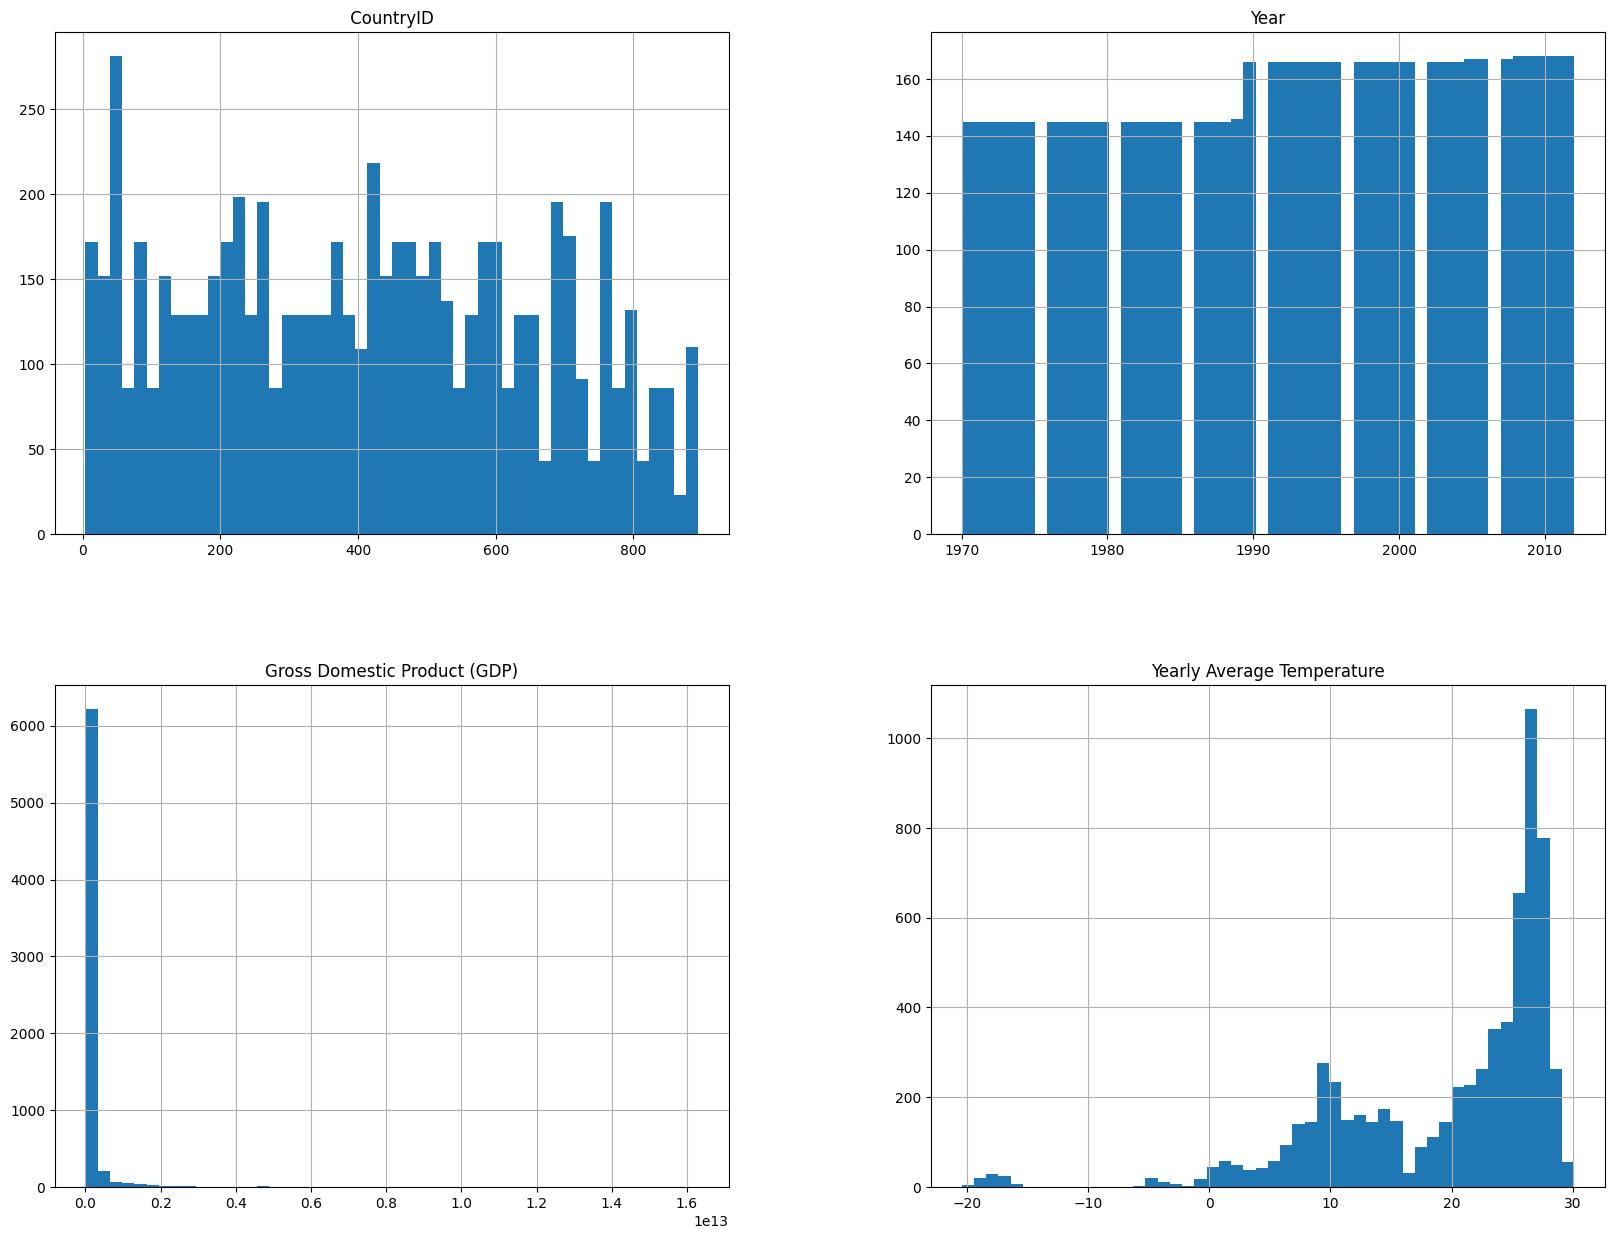

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt
economy_and_temperature_statistics.hist(bins=50, figsize=(20,15))
plt.show()

In [264]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(economy_and_temperature_statistics, test_size=0.2, random_state=42)

In [271]:
check_correlation = economy_and_temperature_statistics.copy().drop("Country", axis=1)
corr_matrix = check_correlation.corr()
corr_matrix["Gross Domestic Product (GDP)"].sort_values(ascending=False)

Year                            1.000000
Gross Domestic Product (GDP)    0.127452
 CountryID                      0.014493
Yearly Average Temperature     -0.018307
Name: Year, dtype: float64

array([[<Axes: xlabel='Yearly Average Temperature', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Yearly Average Temperature'>,
        <Axes: xlabel='Year', ylabel='Yearly Average Temperature'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Gross Domestic Product (GDP)'>,
        <Axes: xlabel='Year', ylabel='Gross Domestic Product (GDP)'>],
       [<Axes: xlabel='Yearly Average Temperature', ylabel='Year'>,
        <Axes: xlabel='Gross Domestic Product (GDP)', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

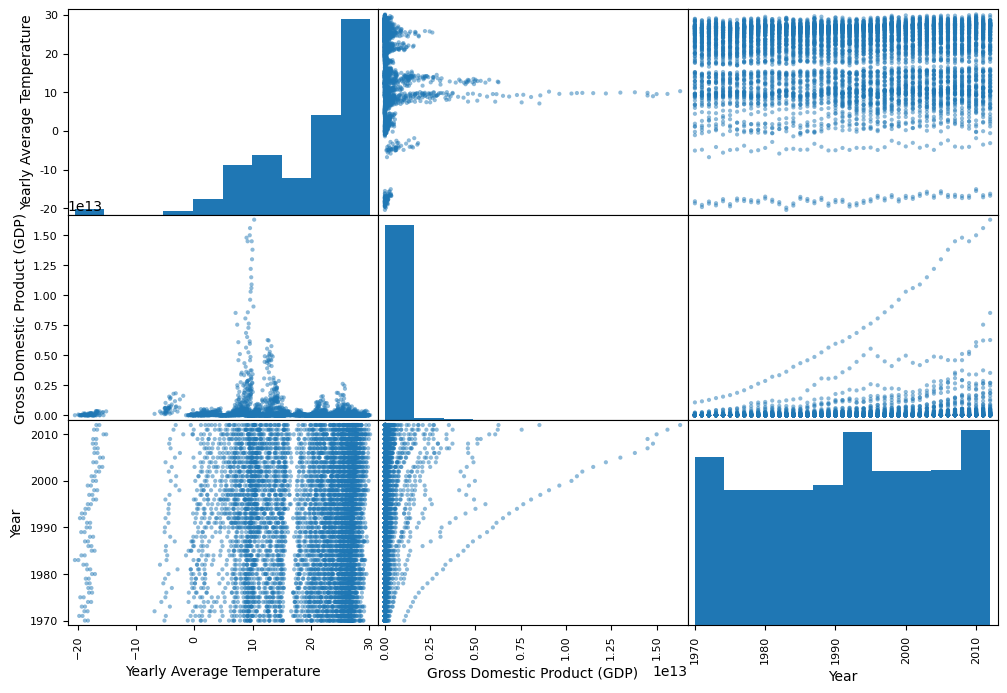

In [272]:
from pandas.plotting import scatter_matrix
attributes = ["Yearly Average Temperature", "Gross Domestic Product (GDP)", "Year"]
scatter_matrix(economy_and_temperature_statistics[attributes], figsize=(12, 8))